Statevector([ 0.06881308+0.07316354j,  0.03660471+0.17104727j,
             -0.00951422+0.08141106j, -0.36497363+0.15281173j,
             -0.09563991-0.19384088j,  0.68658938-0.02235881j,
             -0.18841057+0.49109763j,  0.02394955+0.01281192j],
            dims=(2, 2, 2))
[0.01008814 0.03059707 0.00671828 0.15655718 0.04672128 0.47190489
 0.27667543 0.00073773]


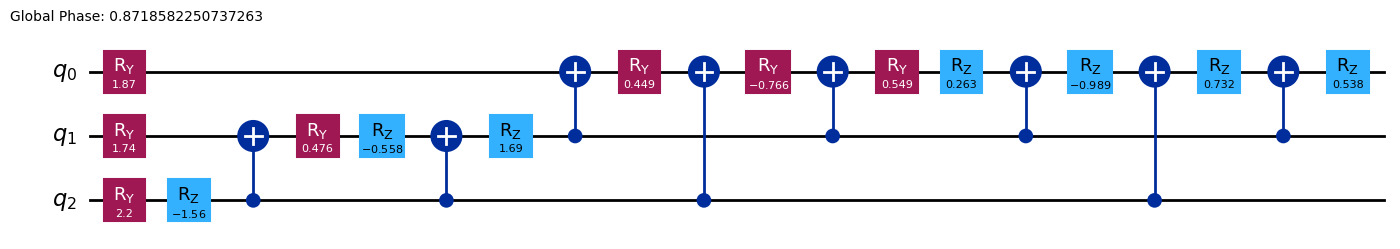

In [1]:
import qiskit
import qiskit.quantum_info
import numpy as np
import time
%load_ext autoreload
%autoreload 2
def transpiled_circuit(qc):
    qc = qiskit.transpile(qc, optimization_level = 2)
    return qc

def transpiled_circuit_clifford(qc):
    qc = qiskit.transpile(qc, 
        basis_gates=['h', 'cx', 's',
                    'rx','ry','rz'])
    return qc

def haar(num_qubits: int):
    """
    to generate random matrix for Haar measure
    see https://arxiv.org/pdf/math-ph/0609050.pdf
    """
    d = 2**num_qubits
    array = (np.random.randn(d,d) + 1j*np.random.randn(d,d))/np.sqrt(2.0)
    ortho,upper = np.linalg.qr(array)
    diag = np.diagonal(upper)
    temp = diag/np.absolute(diag)
    result = np.multiply(ortho,temp,ortho)
    basic_state = np.zeros(d)
    basic_state[0] = 1
    return result @ basic_state

num_qubits = 3
state = haar(num_qubits)
qc = qiskit.QuantumCircuit(num_qubits)
qc.prepare_state(state, list(range(0, num_qubits)))
qc_transpiled = transpiled_circuit_clifford(qc)
print(qiskit.quantum_info.Statevector.from_instruction(qc_transpiled))
print(qiskit.quantum_info.Statevector.from_instruction(qc).probabilities())
qc_transpiled.draw('mpl')

In [23]:
from qoop.core.random_circuit import generate_with_pool

qc = generate_with_pool(16, 16)
qc = qc.assign_parameters(np.random.rand(qc.num_parameters))
import time
start = time.time()
for i in range(10):
    state = (qiskit.quantum_info.Statevector.from_instruction(qc).data)
print(time.time()-start)

0.5629994869232178


In [19]:
25.86552143096924/10000

0.002586552143096924

In [12]:
num_qubits = 12
num_repeat = 5

import constant
from problem import qrc
# ---- Benchamrking QRC ----
packages = constant.packages.copy()
packages.remove("Qiskit")
timess = np.zeros((len(packages), num_qubits))
funcs = [qrc.qrc_Qsun, qrc.qrc_ProjectQ, qrc.qrc_Pennylane]
for j, package in enumerate(packages):
    func_name = f"qrc_{package}"
    print(func_name)
    for i in range(1, num_qubits + 1):
        from qoop.core.random_circuit import generate_with_pool
        random_circuit = generate_with_pool(i, 10)
        random_circuit = random_circuit.assign_parameters(np.random.rand(random_circuit.num_parameters))
        times = []
        for _ in range(num_repeat):
            start = time.time()
            prob = funcs[j](i, random_circuit)
            end = time.time()
            times.append(end-start)
        timess[j][i - 1] = np.mean(times)
print(timess)

qrc_Qsun
qrc_ProjectQ
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python 

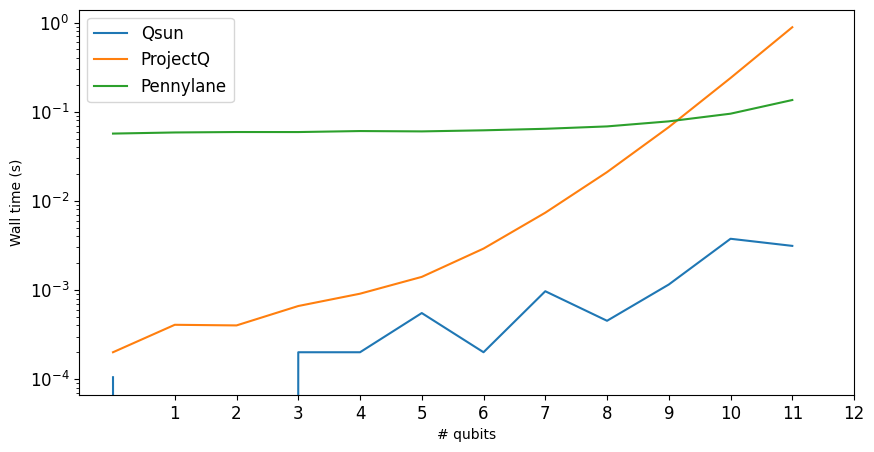

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for j in range(len(timess)):
    plt.plot(timess[j], label=packages[j]) 

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')